In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy 
import gdal
from read_tif import multiband_to_array
from build_laplacian import nystrom_extension
from segmentation import semi_supervised
from sklearn.cluster import KMeans
from itertools import permutations

In [2]:
img=multiband_to_array('DC_subset_tif.tif')
print(img.shape)

(1280, 307, 64)


In [3]:
X = img
X = X.reshape(X.shape[0]*X.shape[1], X.shape[2])

In [4]:
mat_gt = sio.loadmat('gt.mat')
mat_gt

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 12 15:50:31 2018',
 '__version__': '1.0',
 '__globals__': [],
 'img1': array([[-1, -1, -1, ..., -1, -1, -1]], dtype=int16)}

In [5]:
label = mat_gt['img1']
label=label[0]
np.set_printoptions(threshold=392960)
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [6]:
mat_comparison = sio.loadmat('comparison.mat')
comparison=mat_comparison['image'][0]
comparison

array([0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 3, 3, 3, 3, 3, 2, 0, 0, 1, 1, 1, 1,
       1, 1, 4, 0, 1, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 0, 1, 1,
       1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 3, 3, 3,
       2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2,

In [7]:
print(label.shape)
print(comparison.shape)

(392960,)
(392960,)


# Semi-supervised Algorithm

1 0.2420857084690554
2 0.8476995114006515
3 0.9305807206840391
4 0.9636655130293159
5 0.9783845684039087
6 0.9862683224755701
7 0.9907929560260587
8 0.9931926913680782
9 0.9947221091205212
10 0.9956509568403908


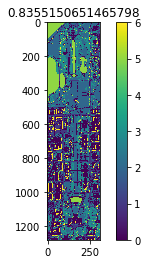

In [8]:
m=126
sigma2 = 0.02
dt=0.005
mu = 0.5
num_class=7
pure = 0.995
u = semi_supervised(X, sigma2, label, num_class, m, dt, mu, pure)
r = np.argmax(u, axis=1)
plt.imshow(r.reshape(1280,307))
plt.title(np.sum(r==comparison)/len(comparison))
plt.colorbar()
plt.imsave('result.png',r.reshape(1280, 307))

# Searching for the best sigma2

1 0.24111868892508143
2 0.8450656555374593
3 0.9311965594462541
4 0.9676760993485342
5 0.9850646376221498
6 0.9888334690553746
7 0.9928847719869707
8 0.9942869503257329
9 0.9948773412052118
10 0.9952514250814333
1 0.24087184446254073
2 0.8562932614006514
3 0.9401643933224756
4 0.971577259771987
5 0.9825758346905538
6 0.987764657980456
7 0.9908285830618893
8 0.9926302931596092
9 0.9940095684039087
10 0.9954804560260586
1 0.24126374185667754
2 0.8579600977198697
3 0.9410779723127036
4 0.969378562703583
5 0.9800743078175895
6 0.9857873574918566
7 0.9893373371335505
8 0.9907166123778501
9 0.9917625203583061
10 0.993213049674267
11 0.9940451954397395
12 0.9946813925081434
13 0.995027483713355
1 0.24140370521172638
2 0.8490431596091205
3 0.9368027280130293
4 0.9650371539087947
5 0.980567996742671
6 0.9861996131921824
7 0.9907573289902281
8 0.9934344462540716
9 0.9944498167752444
10 0.995299776058632
1 0.24189739413680783
2 0.8468953583061889
3 0.9350010179153094
4 0.9672434853420195
5 0.9808

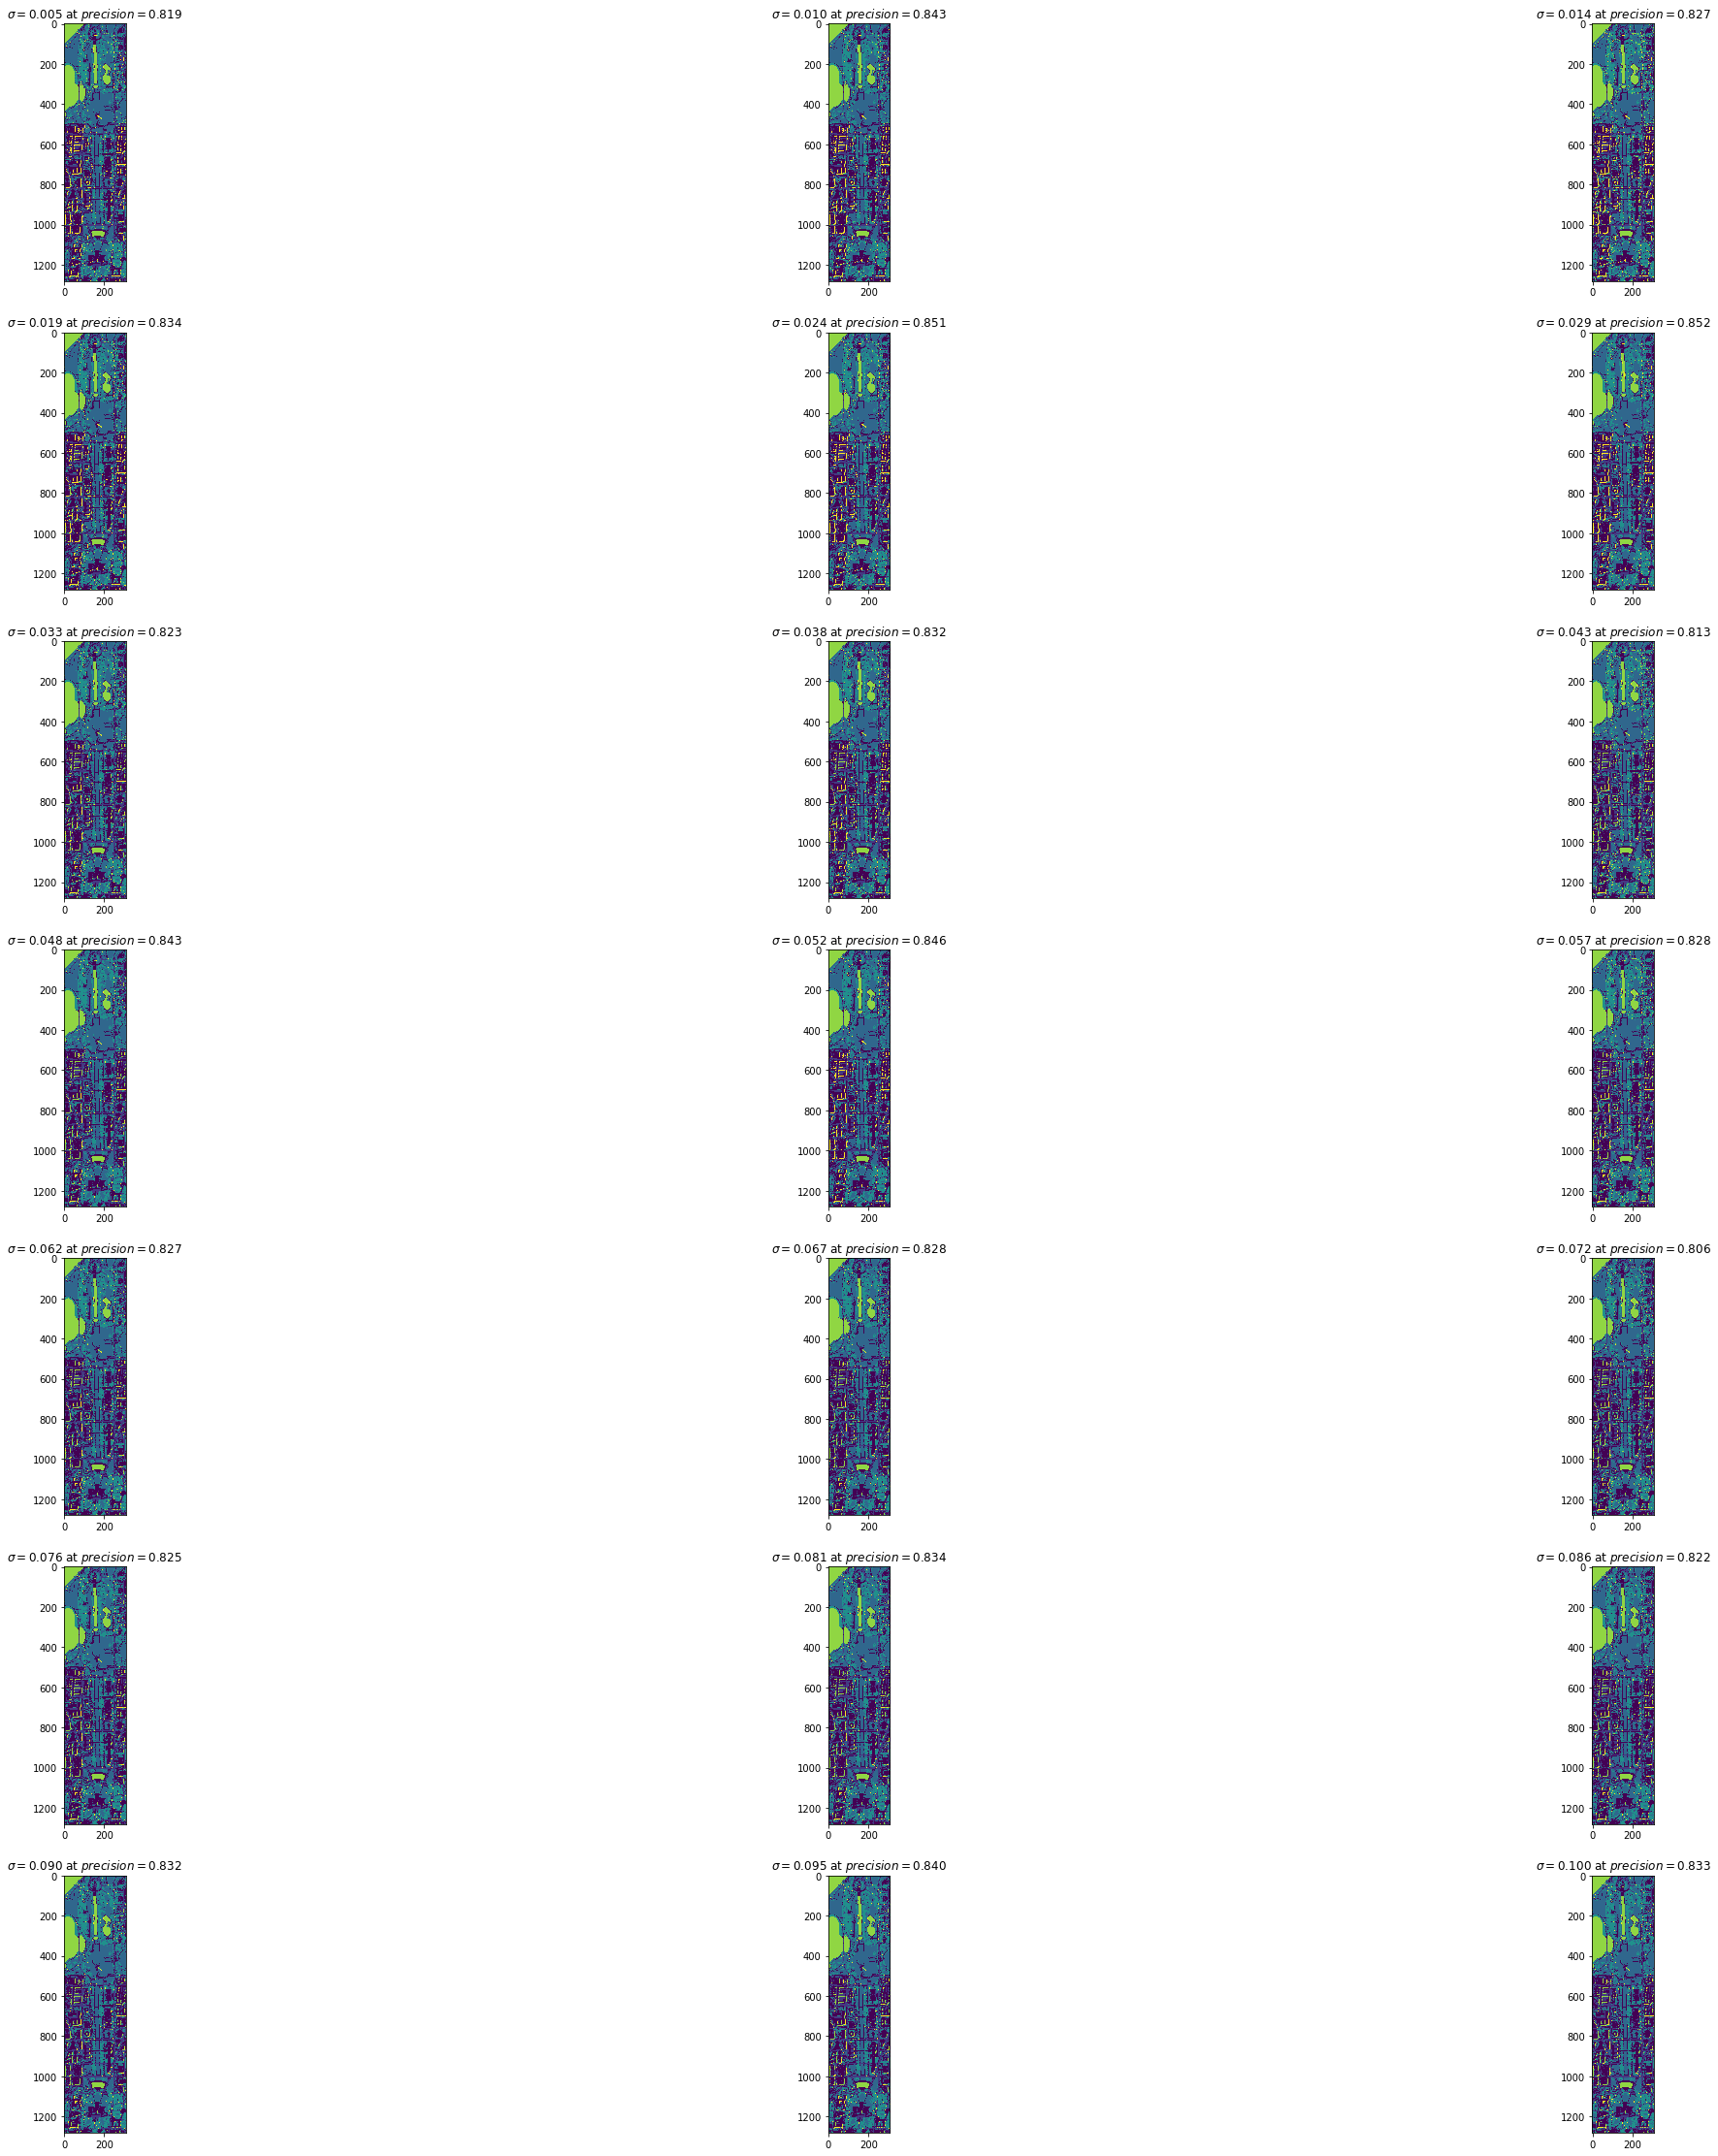

In [9]:
fig = plt.figure(figsize=(40,40))
list_sigma = np.linspace(0.005,0.1,21)
for ind, sigm in enumerate(list_sigma):
    u = semi_supervised(X, sigm, label, num_class, m, dt, mu, pure)
    r = np.argmax(u, axis=1)
    plt.subplot(7,3,ind+1)
    plt.imshow(r.reshape(1280,307))
    plt.title("$\sigma=%0.3f$ at $precision= %0.3f$"%(sigm, np.sum(r==comparison)/len(comparison)))
plt.show()

# Searching for the best mu

1 0.24132990635179152
2 0.8438925081433225
3 0.9346778298045603
4 0.9680120114006515
5 0.9794330211726384
6 0.9863752035830619
7 0.9917421620521173
8 0.9940884568403909
9 0.9954982695439739
1 0.24185158794788272
2 0.8553084283387622
3 0.940042243485342
4 0.9691317182410424
5 0.9805781758957655
6 0.9850213762214983
7 0.987698493485342
8 0.9912255700325733
9 0.993134161237785
10 0.9934878868078176
11 0.9934471701954397
12 0.9941393526058632
13 0.9960835708469056
1 0.2411772190553746
2 0.8492543770358306
3 0.9364108306188925
4 0.9673096498371335
5 0.9802346294788273
6 0.9857466408794788
7 0.9905079397394136
8 0.9932868485342019
9 0.9952285219869706
1 0.24171416938110749
2 0.8590212744299675
3 0.9352987581433225
4 0.9641184853420195
5 0.9786517711726385
6 0.9855277890879479
7 0.9890726791530945
8 0.9914800488599349
9 0.9935769543973941
10 0.9958774429967426
1 0.24118739820846904
2 0.8474017711726385
3 0.9350722719869707
4 0.9664571457654723
5 0.9799165309446254
6 0.9858891490228013
7 0.989

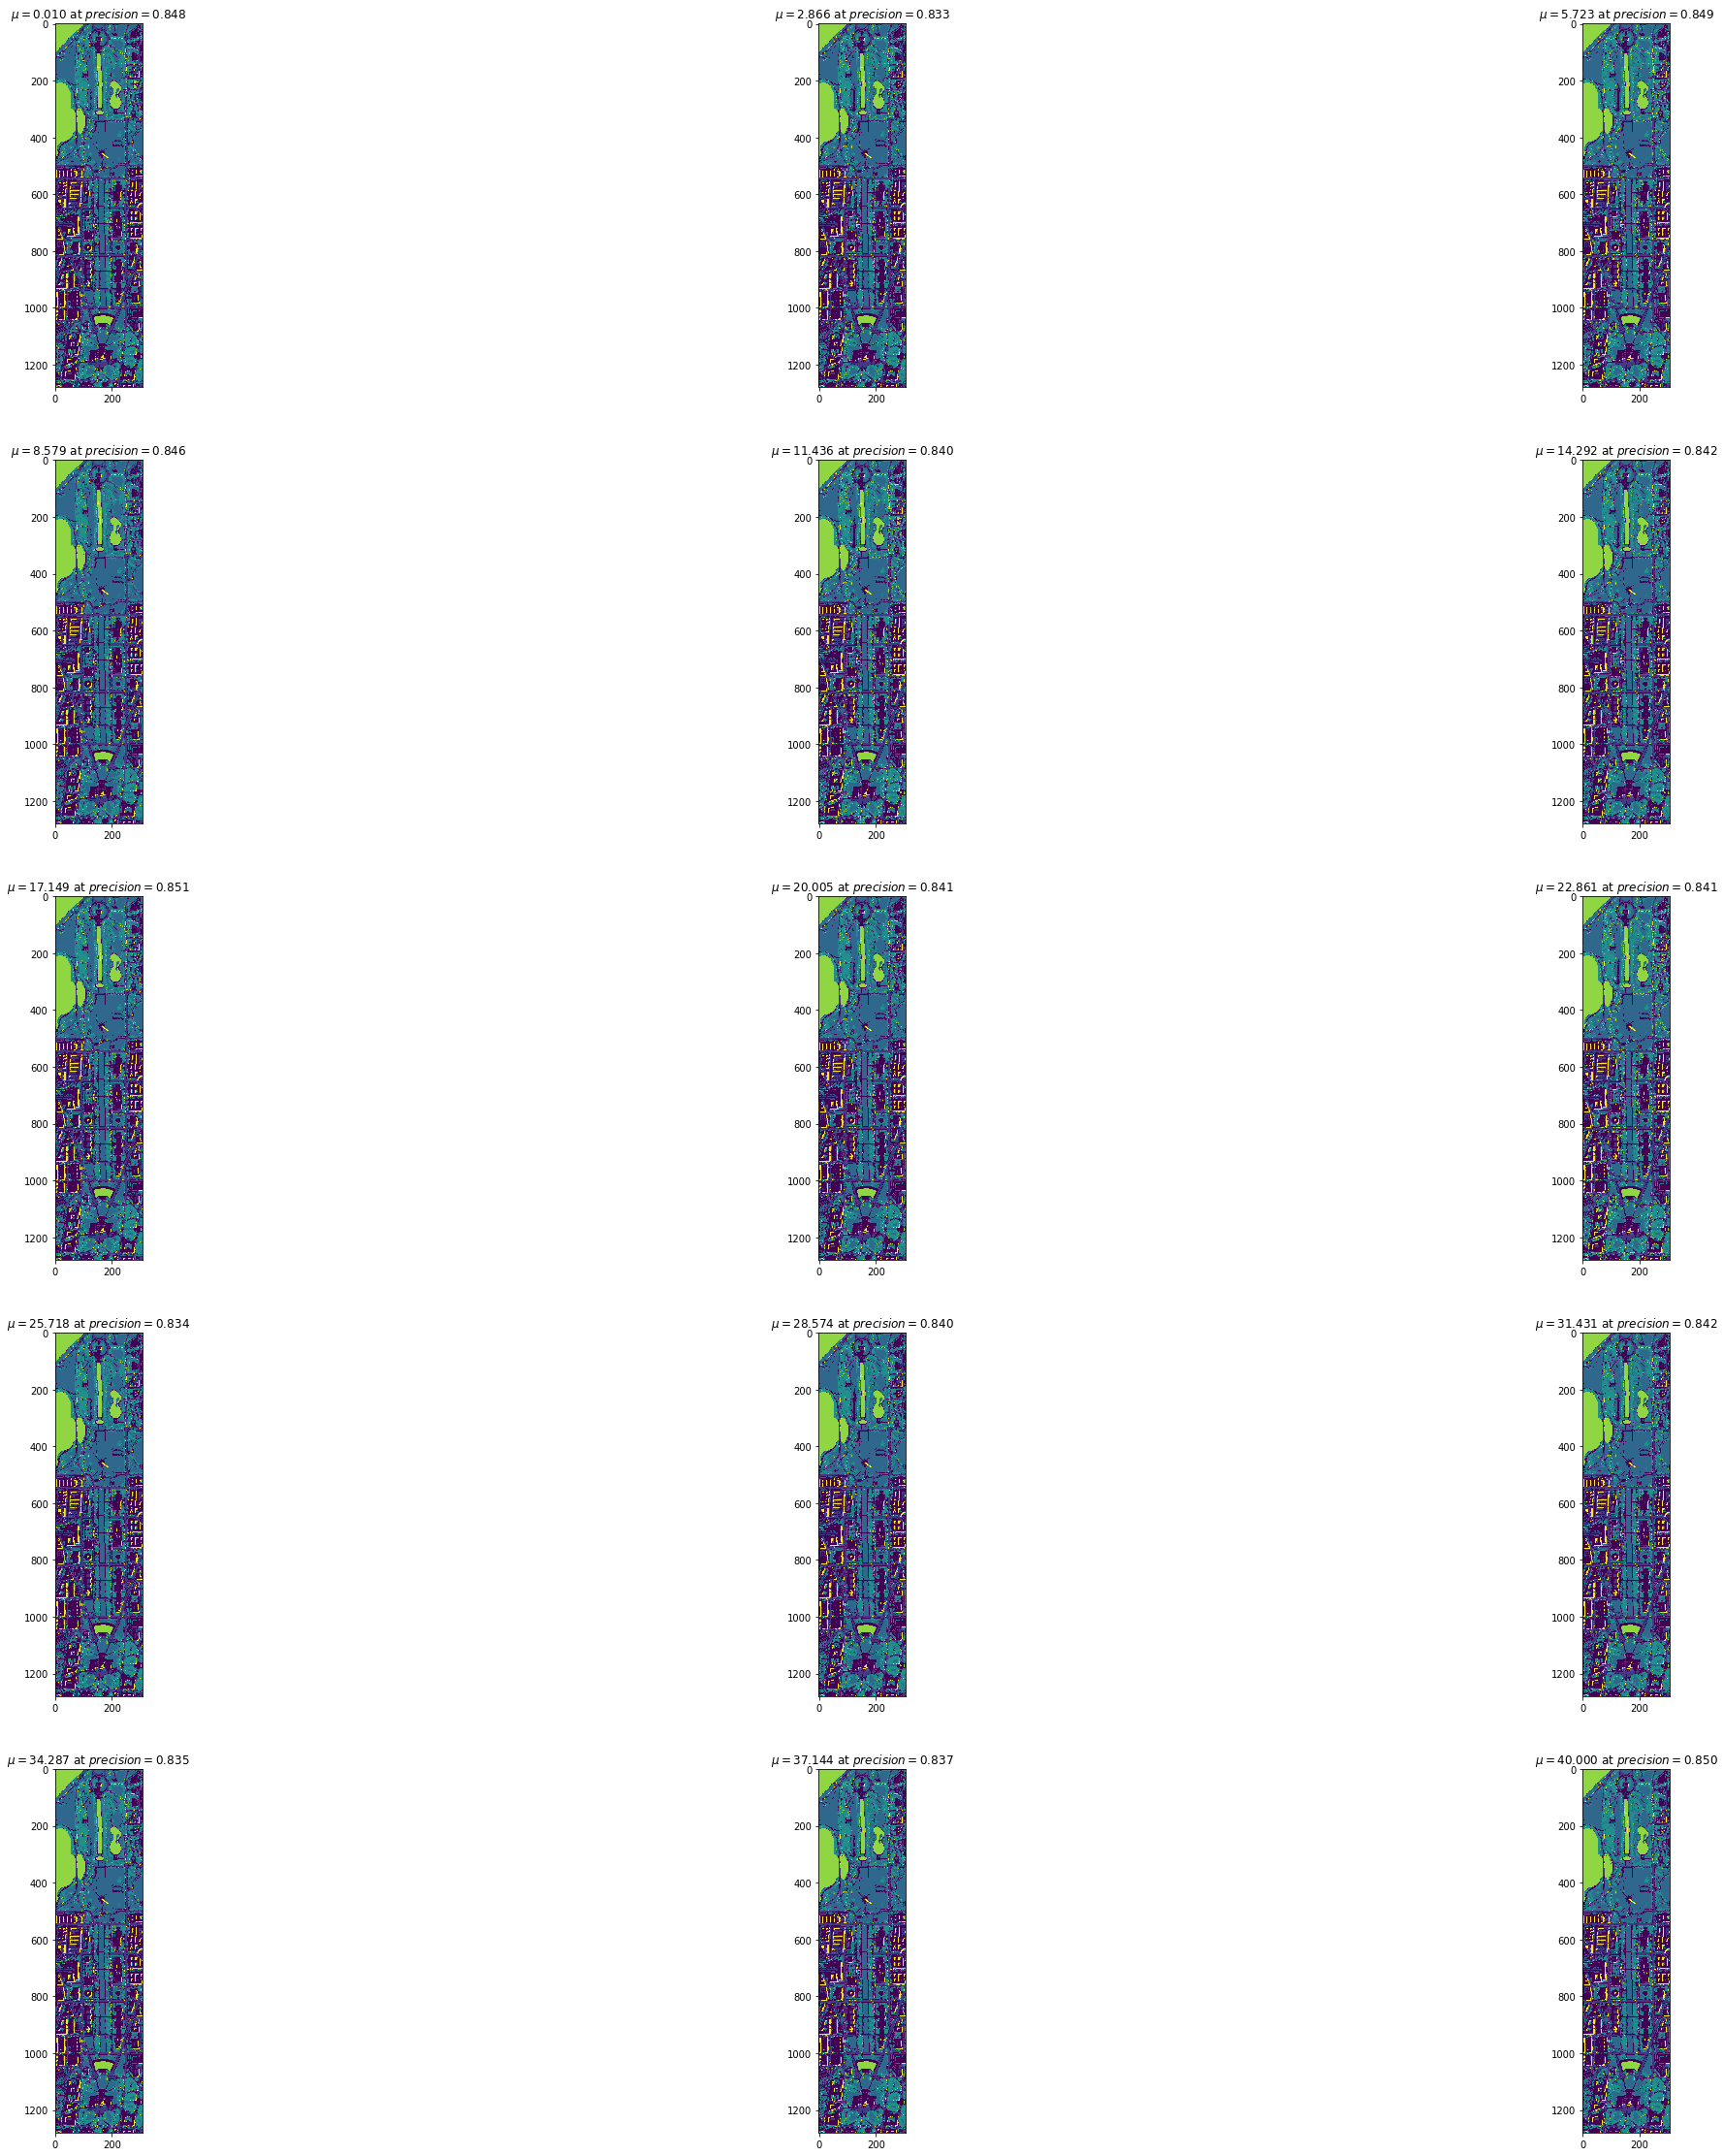

In [10]:
fig = plt.figure(figsize=(40,40))
list_mu = np.linspace(0.01,40,15)
for ind, lmu in enumerate(list_mu):
    u = semi_supervised(X, sigma2, label, num_class, m, dt, lmu, pure)
    r = np.argmax(u, axis=1)
    plt.subplot(5,3,ind+1)
    plt.imshow(r.reshape(1280,307))
    plt.title("$\mu=%0.3f$ at $precision= %0.3f$"%(lmu, np.sum(r==comparison)/len(comparison)))
plt.show()

1 0.2421900447882736
2 0.8493103623778502
3 0.9302117263843648
4 0.9645103827361563
5 0.9809191775244299
6 0.9878384568403908
7 0.9901771172638436
8 0.9933122964169381
9 0.9953430374592834


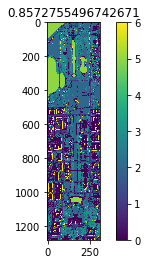

In [11]:
u = semi_supervised(X, sigma2, label, num_class, m, dt, 0, pure)
r = np.argmax(u, axis=1)
plt.imshow(r.reshape(1280,307))
plt.title(np.sum(r==comparison)/len(comparison))
plt.colorbar()

# Searching for the best dt

1 0.24120775651465798
2 0.8495953786644951
3 0.9280308428338763
4 0.9686431188925081
5 0.9839194828990228
6 0.990009161237785
7 0.9914291530944626
8 0.9923350977198697
9 0.9949002442996743
10 0.9959741449511401
1 0.24007787052117263
2 0.8560642304560261
3 0.9374440146579804
4 0.964678338762215
5 0.9812347312703583
6 0.9881387418566775
7 0.9920475366449512
8 0.9938925081433225
9 0.9942385993485342
10 0.994001934039088
11 0.9940172027687296
12 0.9951750814332248
1 0.24151313110749187
2 0.8575045806188925
3 0.9402331026058632
4 0.9672154926710098
5 0.9804407573289903
6 0.9867314739413681
7 0.9895281962540716
8 0.9913222719869706
9 0.992650651465798
10 0.9938899633550489
11 0.9950325732899022
1 0.2403501628664495
2 0.8604768933224756
3 0.9373931188925081
4 0.9650549674267102
5 0.9768118892508143
6 0.9840721701954397
7 0.9887723941368078
8 0.9906529926710098
9 0.991955924267101
10 0.9927422638436482
11 0.9933759161237785
12 0.993716917752443
13 0.9939205008143323
14 0.9936532980456027
15 0.

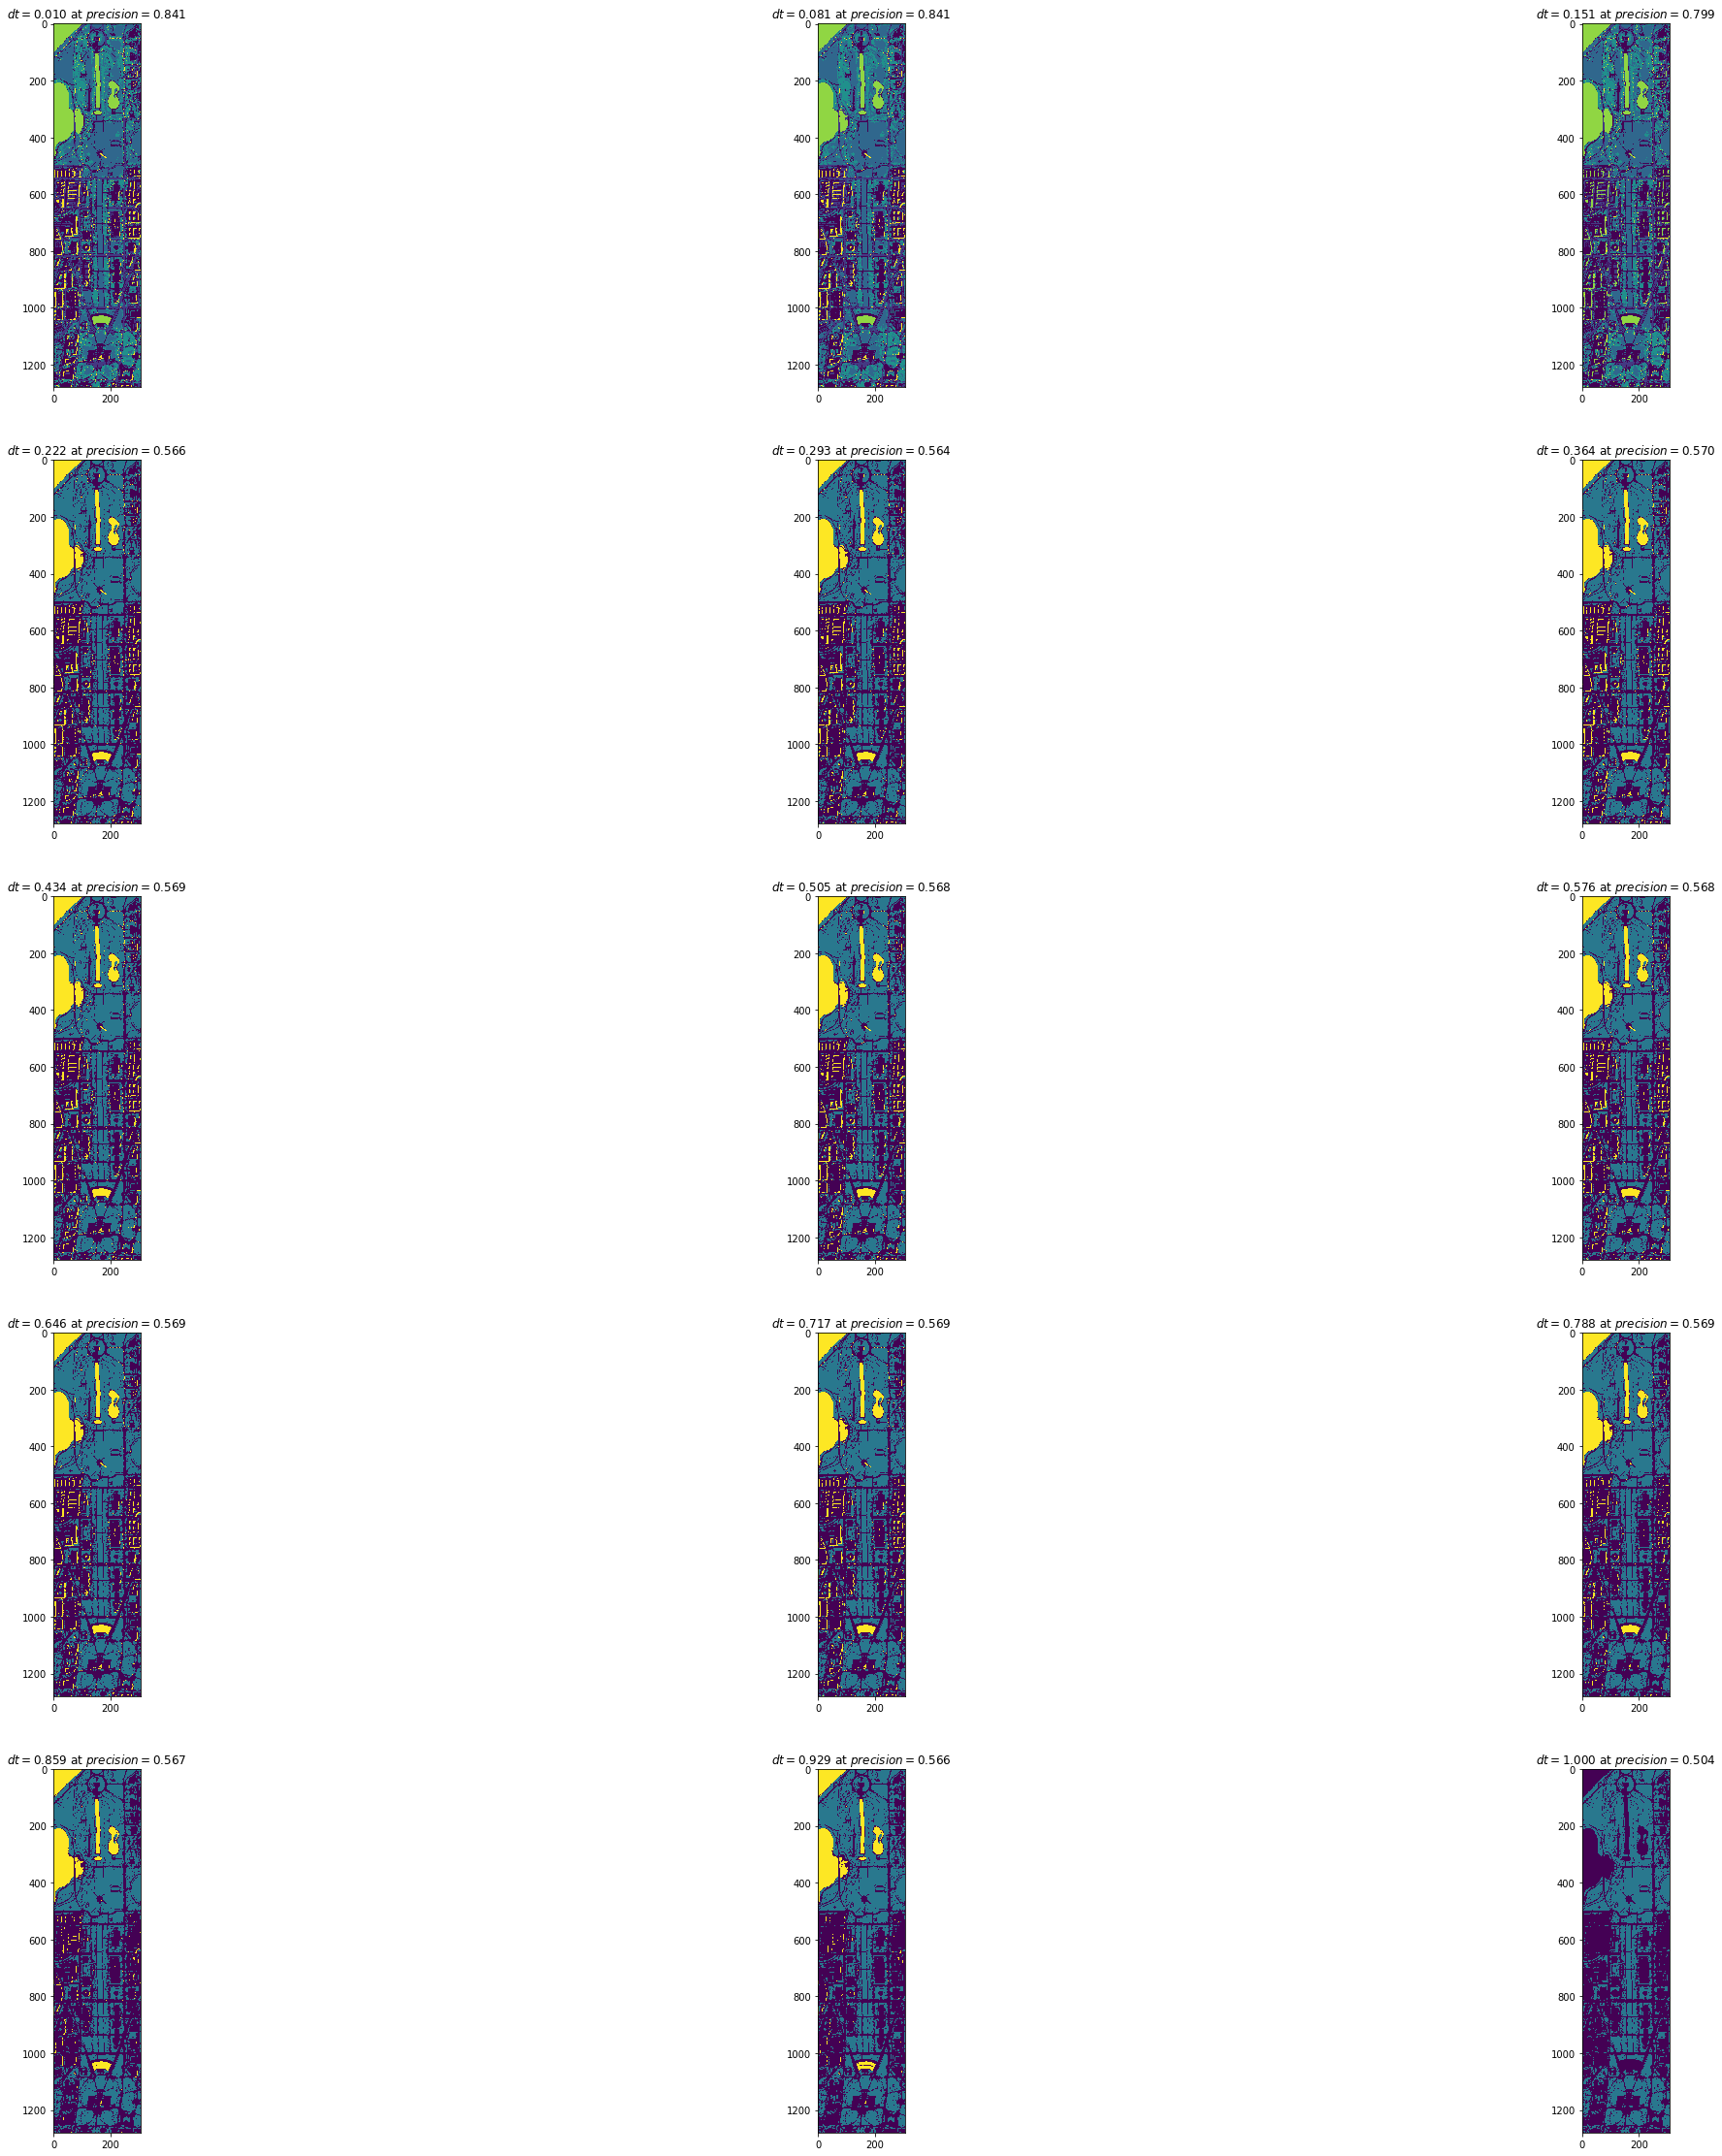

In [12]:
fig = plt.figure(figsize=(40,40))
list_dt = np.linspace(0.01,1,15)
for ind, ldt in enumerate(list_dt):
    u = semi_supervised(X, sigma2, label, num_class, m, ldt, mu, pure)
    r = np.argmax(u, axis=1)
    plt.subplot(5,3,ind+1)
    plt.imshow(r.reshape(1280,307))
    plt.title("$dt=%0.3f$ at $precision= %0.3f$"%(ldt, np.sum(r==comparison)/len(comparison)))
plt.show()

# Searching for the best m

1 0.24143424267100977
2 0.8506718241042345
3 0.9368587133550489
4 0.9693556596091205
5 0.9812245521172639
6 0.9877366653094463
7 0.9902152890879479
8 0.9916174674267101
9 0.9941800692182411
10 0.9953862988599349
1 0.24211879071661238
2 0.8579066571661238
3 0.9323798859934853
4 0.9671518729641694
5 0.9832654723127036
6 0.9895994503257329
7 0.9917192589576547
8 0.992022088762215
9 0.9941749796416938
10 0.9962031758957655
1 0.2416505496742671
2 0.8533591205211727
3 0.9385102809446254
4 0.9683402890879479
5 0.9819167345276874
6 0.9878766286644951
7 0.9908056799674267
8 0.9913858916938111
9 0.9916225570032573
10 0.9933835504885994
11 0.994068098534202
12 0.9947475570032573
13 0.9957603827361563
1 0.24160728827361563
2 0.8457578379478827
3 0.9365253460912052
4 0.9650117060260587
5 0.9798071050488599
6 0.9868587133550488
7 0.9893195236156351
8 0.9895281962540716
9 0.9899837133550489
10 0.9931774226384364
11 0.9946661237785016
12 0.9952870521172639
1 0.24118994299674268
2 0.8496284609120521
3 

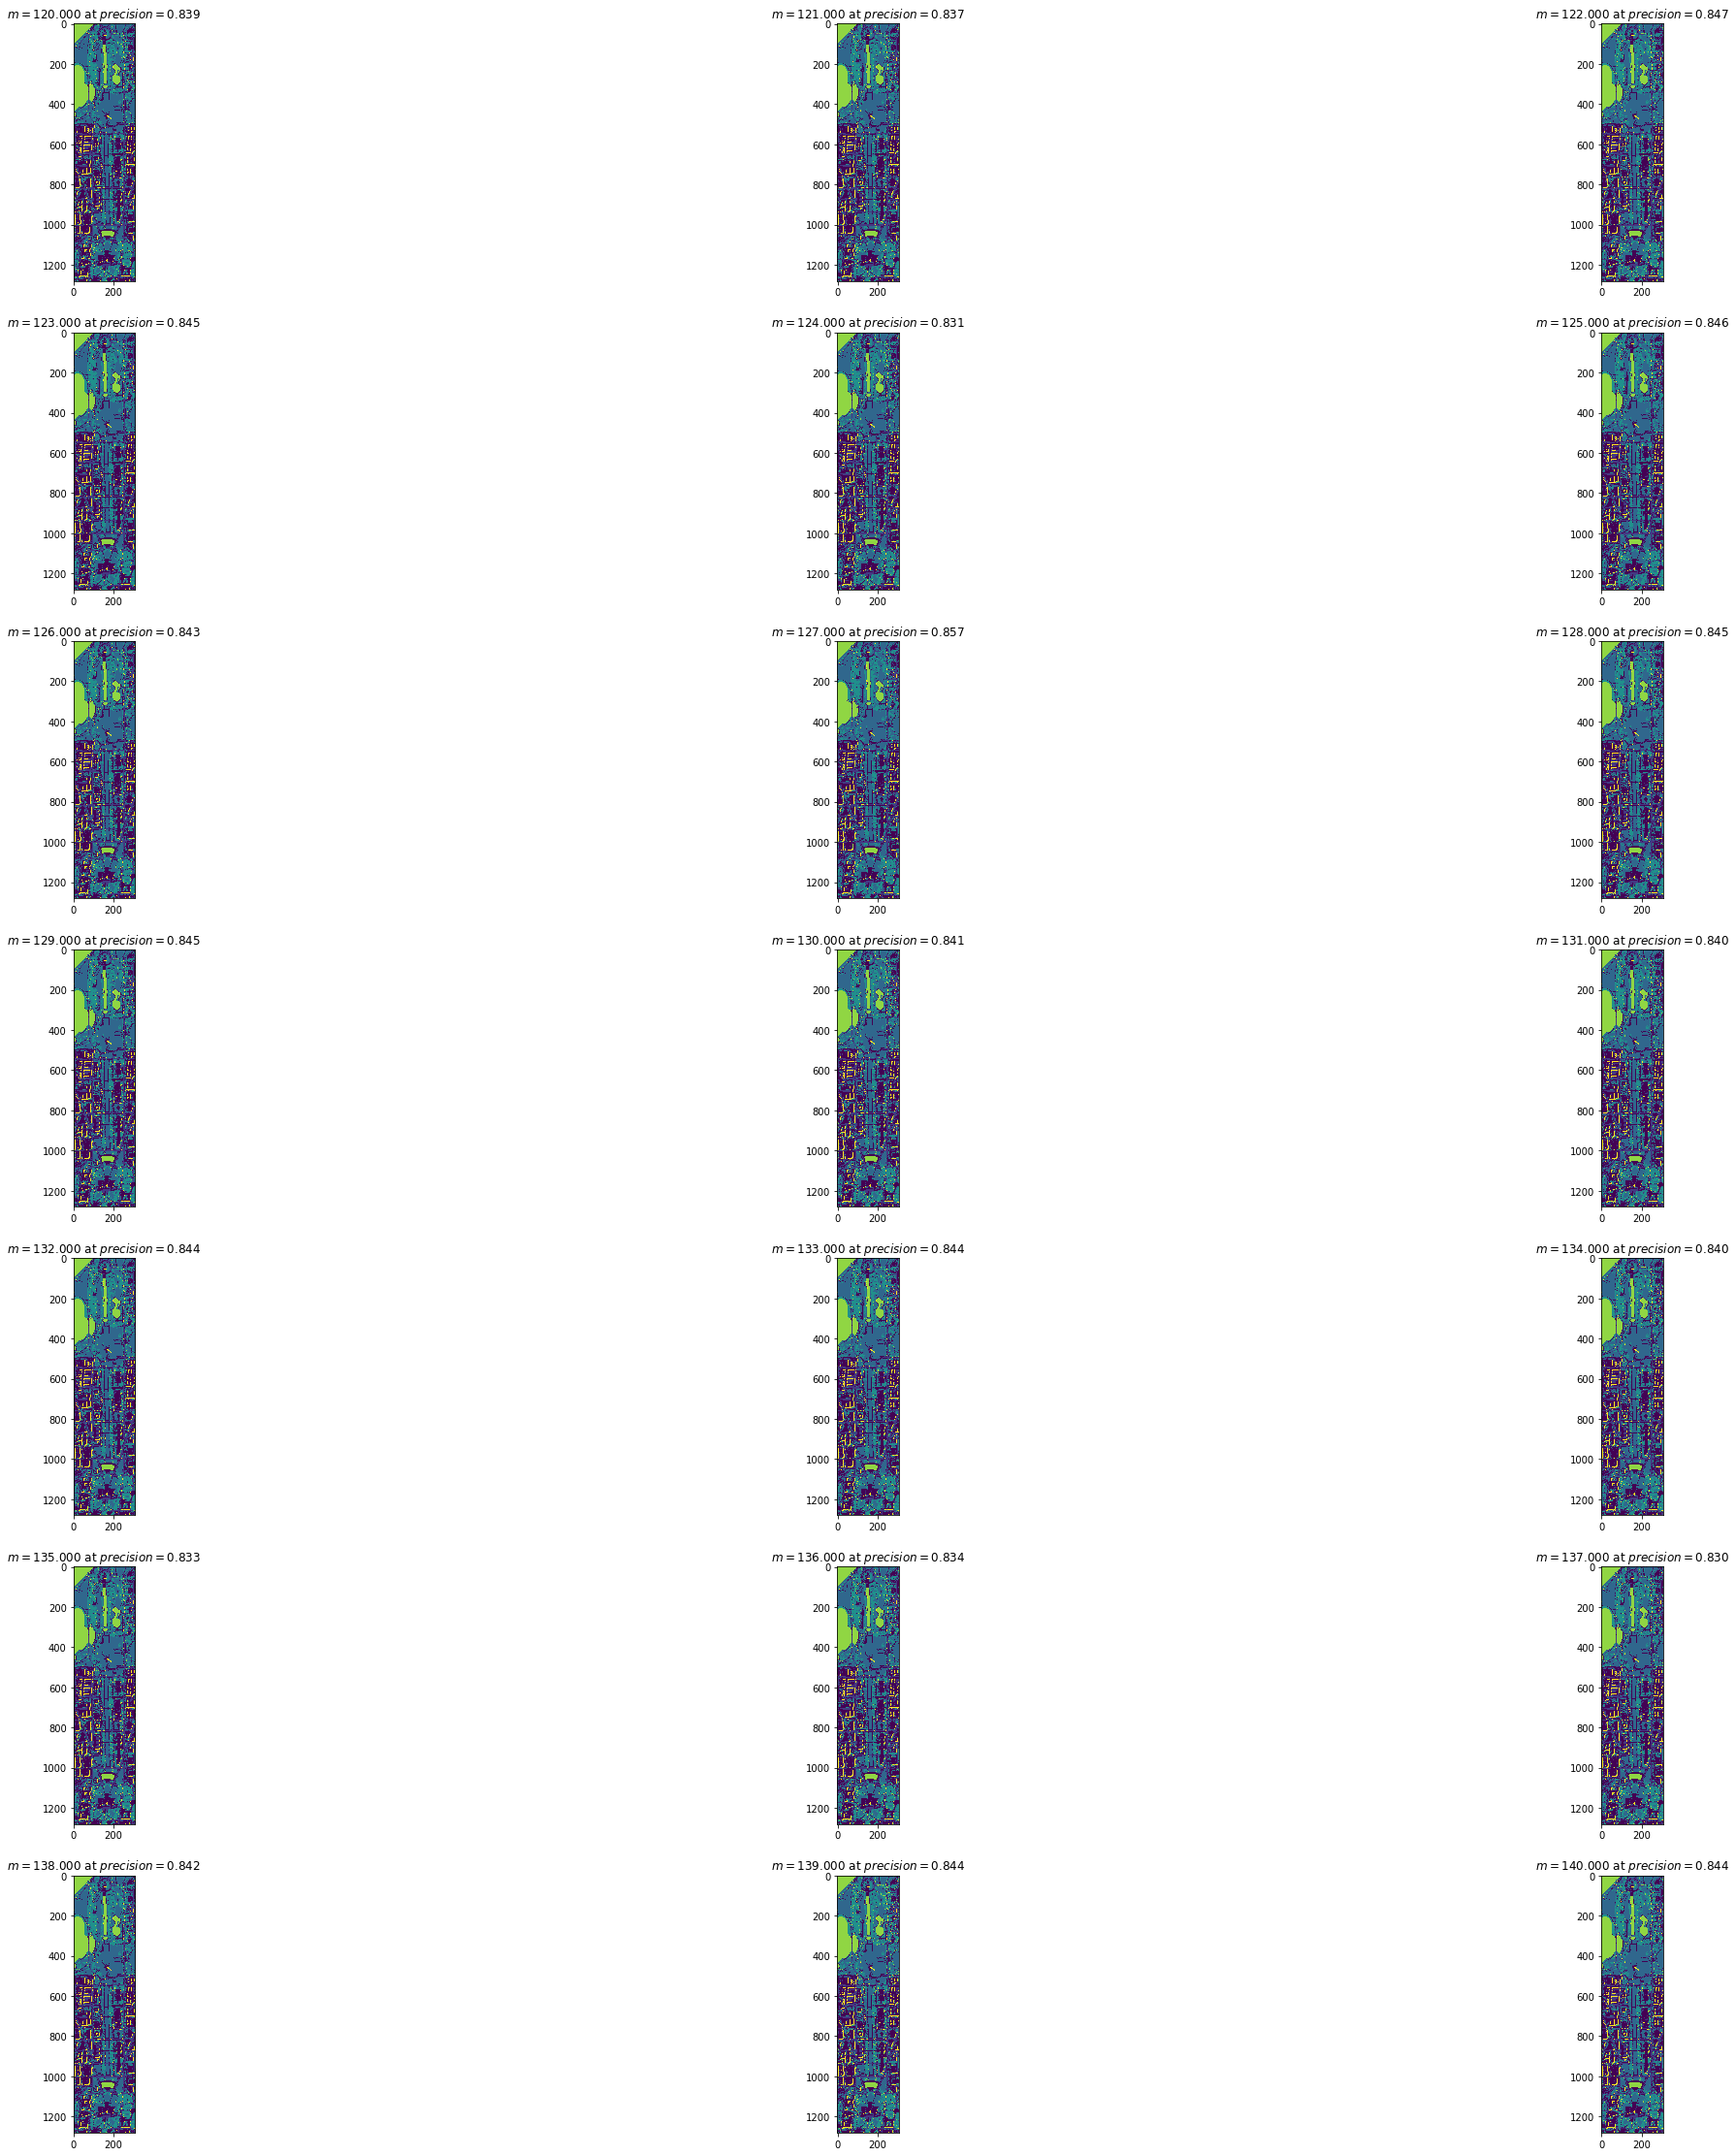

In [13]:
fig = plt.figure(figsize=(40,40))
list_m = np.linspace(120,140,21).astype(int);
for ind, lm in enumerate(list_m):
    u = semi_supervised(X, sigma2, label, num_class, lm, dt, mu, pure)
    r = np.argmax(u, axis=1)
    plt.subplot(7,3,ind+1)
    plt.imshow(r.reshape(1280,307))
    plt.title("$m=%0.3f$ at $precision= %0.3f$"%(lm, np.sum(r==comparison)/len(comparison)))
plt.show()

# Stability of the method

In [14]:
score = []
for i in range(10):
    u = semi_supervised(X, sigma2, label, num_class, m, dt, mu, pure)
    r = np.argmax(u, axis=1)
    score.append(np.sum(r==comparison)/len(comparison))
print('--------------------------------')
print(np.mean(score))
print(np.std(score))

1 0.24134517508143322
2 0.8508041530944626
3 0.9343520969055374
4 0.9650473330618893
5 0.981613904723127
6 0.9874847312703583
7 0.9913757125407167
8 0.9930985342019544
9 0.9943276669381107
10 0.9950020358306189
1 0.24197119299674266
2 0.8570108916938111
3 0.9347898004885994
4 0.9600213762214984
5 0.9737072475570032
6 0.9828404926710098
7 0.9897419584690553
8 0.9930450936482085
9 0.9947093851791531
10 0.9956433224755701
1 0.24202972312703583
2 0.8479056392508143
3 0.933891490228013
4 0.9654443200325733
5 0.9792090798045603
6 0.984395358306189
7 0.9864948086319218
8 0.9880445846905538
9 0.9904952157980456
10 0.9927575325732899
11 0.9944523615635179
12 0.9955059039087948
1 0.24271172638436483
2 0.8584308835504886
3 0.9369325122149837
4 0.9644340390879479
5 0.9768831433224756
6 0.9875432614006515
7 0.9917777890879479
8 0.9929636604234527
9 0.995047842019544
1 0.24138589169381108
2 0.8572271986970684
3 0.9355914087947883
4 0.9629911441368079
5 0.9790385789902281
6 0.9870470276872965
7 0.988

# Spectral Clustering

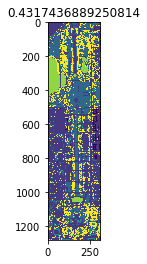

In [15]:
S, V = nystrom_extension(X, m, sigma2, cosine=True)
km = KMeans(n_clusters=7)
km.fit(V)
y = km.predict(V)
plt.imshow(y.reshape(1280,307))
plt.title(np.sum(y==comparison)/len(comparison))
plt.show()